<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/12_POO_otros_conceptos%20ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

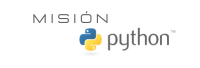

# Conceptos POO aplicados en Python

Ya hemos abordado algunos de los principales conceptos de la POO en Python como **Clases**, **Objetos**, **Asociación**, **Agregación**, **Composición**, **Herencia**, **Atributos y Métodos de instancia y de clase**, **Métodos estáticos**, **Modificadores de acceso**, etc.  


A continuación profundizaremos en otros conceptos importantes asociados a la POO y aplicados en Python

## Encapsulación

Ya anteriormente vimos cómo declarar los atributos de una clase privados __atributo_privado.  

El objetivo de la encapsulación es ocultar la complejidad interna de un objeto y exponer solamente una interfaz pública que permita interactuar con él.  En términos prácticos sería poner los atributos privados (para que no puedan ser accedidos o modificados directamente) y los métodos públicos que accedan o modifiquen el estado del objeto.  

**¿Ventajas de la encapsulación?**

Miremos un ejemplo de una clase **sin** encapsulación y **con** encapsulación

In [ ]:
#Ejemplo sin encapsulación
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
######################################

p = Persona ("Juan",-30)
print (f"{p.nombre} tiene {p.edad} años")


Cuando permitimos que se pueda acceder directamente a los atributos de una clase, no existe manera de protegerla para evitar el acceso o modificación incorrecta de su estado.   

In [ ]:
#Ejemplo con encapsulación
class Persona:
    def __init__(self, nombre, edad):
        self.set_nombre(nombre)
        self.set_edad(edad)

    def get_nombre(self):
        return self.__nombre

    def set_nombre(self, nombre):
        self.__nombre = nombre

    def get_edad(self):
        return self.__edad

    def set_edad(self, edad):
        self.__edad = edad

p = Persona ("Juan",-30)
#print (f"{p.nombre} tiene {p.edad} años") #esta línea genera error, no podemos acceder a los atributos directamente
print (f"{p.get_nombre()} tiene {p.get_edad()} años") #Solo podemos acceder a los atributos a través de los métodos públicos




**Controlando el acceso a los atributos privados desde los métodos públicos**

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.set_nombre(nombre)
        self.set_edad(edad)

    def get_nombre(self):
        return self.__nombre

    def set_nombre(self, nombre):
        self.__nombre = nombre

    def get_edad(self):
          return self.__edad

    def set_edad(self, edad):
        try:
            if edad >= 0:
                self.__edad = edad
            else:
                raise ValueError("La edad no puede ser negativa")
        except Exception as e:
            self.__edad = None
            print(e)
######################################################################3
p = Persona ("Juan",-90)
print (f"{p.get_nombre()} tiene {p.get_edad()} años")

**Controlando el acceso a los atributos privados a través de las propiedades getter y setter**

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre=nombre
        self.edad=edad

    @property
    def nombre(self):
        return self.__nombre

    @nombre.setter
    def nombre(self, nombre):
        self.__nombre = nombre

    @property
    def edad(self):
        return self.__edad

    @edad.setter
    def edad(self, edad):
        try:
            if edad >= 0:
                self.__edad = edad
            else:
                raise ValueError("La edad no puede ser negativa")
        except Exception as e:
            self.__edad = None
            print(e)
######################################################################3
p = Persona ("Juan",-90)
print (f"{p.nombre} tiene {p.edad} años")

**Ejemplo de Python implementando la encapsulación en sus propias clases**

In [ ]:
lista = [] #Se define un objeto de tipo List vacío
#lista[0] = "hola" #error al intentar establecer un valor directamente
lista.insert(0,"hola")                   #cómo solucionarlo?
print(lista[0])

## Sobrecarga de métodos y constructores

La sobrecarga hace referencia a la capacidad de tener el mismo método definido más de una vez en una clase pero con diferentes cantidades o tipos de parámetros.  En lenguajes como Java, la sobrecarga es un concepto ampliamente aplicable por las características del lenguaje.  Un ejemplo en Java de sobrecarga de constructores es el siguiente:


```
public Persona(){}
public Persona(String nombre){}
public Persona(String nombre, int edad){}
public Persona(String nombre, int edad, String direccion){}
```
Esto permitiría crear objetos de la clase Persona de diferentes maneras.

En Python no existe la sobrecarga de métodos ni de constructores, es decir, aunque podemos declarar varios constructores o métodos con el mismo nombre, solo podemos utilizar aquel que tiene el mayor número de parámetros.    Veamos:



In [ ]:
class Persona:


    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def __init__(self, nombre):
        self.nombre = nombre

    def salude(self):
        print("Hola")

    def salude(self, nombre):
        print(f"Bueno(a)s {nombre}")



##################################################################
p1 = Persona("juan")
#p2 = Persona("pedro", 20)
#p1.salude()
p1.salude("dias")

**¿Porqué Python no usa la sobrecarga?**



¿Podrías acondicionar el código anterior para que las instrucciones de las líneas 15 y 17 funcionen sin problema?

In [ ]:
class Persona:
    def __init__(self, nombre, edad=None):
        self.nombre = nombre
        self.edad = edad

    def salude(self, nombre=None):
      if nombre is None:
        print("Hola")
      else:
        print(f"Bueno(a)s {nombre}")



##################################################################
p1 = Persona("juan")
p2 = Persona("pedro", 20)
p1.salude()
p1.salude("dias")

**Termina la siguiente clase llamada Operaciones en Python para que los llamados a los métodos sumar de las líneas 4, 5, 6 y 7 funcionen correctamente:**

In [ ]:
class Operaciones:
  @staticmethod
  def sumar(*args):
    return sum(args)




###############################
print (Operaciones.sumar(3, 4))
print (Operaciones.sumar(4.5, 3.2))
print (Operaciones.sumar(3 ,4, 8, 10, 12))
print (Operaciones.sumar(2.5 ,4, 8.2, 5, 3.5,4,5,6,7,5,3,3))

Como puedes ver, el dinamismo y la flexibilidad del lenguaje Python hace que no sea necesaria la sobrecarga.

**Un paso más alla...**

¿Qué pasa si como programador no tengo idea de los atributos que se quieran definir en tiempo de ejecución para una clase?

In [ ]:
class Persona:
  def __init__(self, **kwargs):
      for k in kwargs:
          setattr(self, k, kwargs[k])

  def mostrar_informacion(self):
      print(vars(self))
 ############################################

p1 = Persona(nombre="Juan Valencia")
p1.mostrar_informacion()

p2 = Persona(nombre="Claudia Perez", edad=27)
p2.mostrar_informacion()

p3 = Persona(doctor="Ricardo Luna", edad=30, correo="rluna@gmail.com")
p3.mostrar_informacion()

#p1 = Persona(atributo=valor)
#p1 = Persona(**(atributo: valor))



## Sobreescritura

Se refiere a la capacidad de una subclase de modificar o extender el comportamiento de un método definido en una superclase.

Es decir, si una clase hija tiene un método con el mismo nombre y parámetros que uno definido en la clase padre, entonces el método de la clase hija sobrescribe al método de la clase padre.

In [ ]:
class Animal:
    def hacer_sonido(self):
        print("Un animal está haciendo un sonido")

class Perro(Animal):
   def hacer_sonido(self):
    print("El perro está ladrando")
####################################################
animal = Animal()
animal.hacer_sonido()  # salida: "Un animal está haciendo un sonido"

perro = Perro()
perro.hacer_sonido()  # salida: "El perro está ladrando"



## Polimorfismo


Es la capacidad de objetos de diferentes clases de responder a la misma función o método de manera diferente.

Existen diferentes clases de polimorfismos, veamos algunos ejemplos:

**Polimorfismo con métodos**  es quizás el tipo de polimorfismo más reconocido y consiste en la forma en la que dos diferentes objetos responden de manera diferente ante la invocación del mismo método.  

In [ ]:
#Ejemplo Polimorfismo con métodos
class Animal:
    def __init__(self, nombre):
        self.nombre = nombre

    def hablar(self):
        pass

class Perro(Animal):
    def hablar(self):
        return "guau"

class Gato(Animal):
    def hablar(self):
        return "miau"
######################################################
animales = [Perro("Firulays"), Gato("Tom")]

for animal in animales:
    print(animal.nombre + ": " + animal.hablar())

**Polimorfismo con funciones** es la capacidad que tienen las funciones de adaptar su comportamiento para responder de manera diferente ante la invocación con diferentes parámetros

In [ ]:
#Ejemplo Polimorfismo con funciones
def suma(a, b):
    return a + b

print(suma(2, 3))   # Salida: 5
print(suma("Hola", " Mundo"))   # Salida: "Hola Mundo"
print(suma(5.6, 2.5))   # Salida: 8.1
print (suma([3, 2],[4, 9]))  #Salida: [3, 2, 4, 9]

**Polimorfismo paramétrico**  Hace referencia a la capacidad que tiene un método de adaptar su comportamiento de acuerdo con el objeto que recibe como parámetro, sin necesidad de escribir un método diferente para cada tipo de objeto.

In [ ]:
#Ejemplo polimorfismo paramétrico
class Animal:
    def hacer_sonido(self):
        pass

class Perro(Animal):
    def hacer_sonido(self):
        print("¡guau!")

class Gato(Animal):
    def hacer_sonido(self):
        print("¡miau!")
##################################################

def hacer_sonido_animal(animal):
    if isinstance(animal, Animal):
        animal.hacer_sonido()
    else:
        print("Este objeto no es un animal")

perro = Perro()
gato = Gato()
otro_objeto = object()

hacer_sonido_animal(perro)   # Salida: ¡guau!
hacer_sonido_animal(gato)    # Salida: ¡miau!
hacer_sonido_animal(otro_objeto) # Salida: Este objeto no es un animal

## Cohesión

La cohesión es el grado en que los miembros de una clase (atributos y métodos) se relacionan entre sí y trabajan armónicamente para lograr el resultado definido.

En POO se recomienda que las clases tengan una alta cohesión.  Miremos un ejemplo de alta y baja cohesión usando la clase Cuenta

In [ ]:
#Clase Cuenta con baja cohesión:
class Cuenta:
  def __init__(self, saldo, cliente, ciudad):
    self.saldo = saldo
    self.cliente = cliente
    self.ciudad = ciudad

  def calcular_impuesto(self):
    if isinstance(self, Ahorro):
      impuesto = self.saldo *0.05
    else:
      impuesto = self.saldo *0.07
    return impuesto

In [ ]:
#Clase Cuenta con alta cohesión:
class Cuenta:
  def __init__(self, saldo=0):
    self.saldo = saldo

  def depositar(self, monto):
    self.saldo += monto

  def retirar(self, monto):
    if self.saldo-monto >=0:
      self.saldo -= monto

  def consultar(self):
    return self.saldo


## Acoplamiento

El acoplamiento en POO se refiere al nivel de dependencia entre las clases.  De esta manera, un alto acoplamiento significa que los cambios en una clase repercuten en otra.  

En POO se recomienda tener bajo acoplamiento, de esta manera, las clases  están menos interconectadas y son más independientes. Esto puede hacer que el sistema sea más fácil de mantener y modificar.

In [ ]:
#Ejemplo Alto Acoplamiento
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        print(f"Hola, mi nombre es {self.nombre} y tengo {self.edad} años.")

class Empleado:
    def __init__(self, nombre, edad, salario):
        self.persona = Persona(nombre, edad) #esto crea alto acoplamiento
        self.salario = salario

    def presentarse(self):
        self.persona.saludar()
        print(f"Soy un empleado y mi salario es {self.salario}")
################################################################
e = Empleado("Juan", 30, 1200)
e.presentarse()

In [ ]:
#Ejemplo Bajo Acoplamiento
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        print(f"Hola, mi nombre es {self.nombre} y tengo {self.edad} años.")

class Empleado:
    def __init__(self, persona, salario):
        self.persona = persona #bajo acoplamiento
        self.salario = salario

    def presentarse(self):
        self.persona.saludar()
        print(f"Soy un empleado y mi salario es {self.salario}")
###############################################################
p = Persona("Carlos", 45)
e = Empleado(p, 1200)
e.presentarse()

## Clases Abstractas

Una clase abstracta es una clase que no se pueden instanciar directamente y que definen métodos concretos (con código) o abstractos (métodos sin código en su cuerpo).  Estas clases abstractas son creadas para ser heredadas por otras clases concretas cuya obligación es implementar los métodos abstractos heredados.  

**Sintaxis:**

Para definir una clase abstracta en Python se debe importar el módulo **abc** que significa **Abstract Base Classes** este módulo cuenta con una clase **ABC** de la cual debe heredar cualquier clase abstracta.



```
from abc import ABC
class MiClaseAbstracta(ABC):
```
Los métodos abstractos dentro de una clase abstracta deben llevar el decorador @abstractmethod

```
from abc import ABC, abstractmethod

class MiClaseAbstracta(ABC):

    @abstractmethod
    def metodo_abstracto(self):
        pass
```


In [ ]:
from abc import ABC, abstractmethod
class Persona(ABC):

  @abstractmethod
  def saludo(self):
    pass
########################################
p = Persona()

In [ ]:
from abc import ABC, abstractmethod
class Figura(ABC):

  def mensaje (self):
    print ("Hola, soy una figura geométrica")

  @abstractmethod
  def calcular_area(self, lado):
    pass

class Cuadrado(Figura):
  def calcular_area(self, lado):
    return lado * lado

########################################

c = Cuadrado()
print (c.calcular_area(4))


## Interfaces

En Python no existe una palabra reservada para definir una interfaz.  Una iterfaz en Python es una clase abstracta donde todos sus métodos son abstractos.  Al tener una interfaz, la clase concreta que hereda de ella está obligada a implementar todos los métodos definidos en la interfaz.  

In [ ]:
from abc import ABC, abstractmethod
class Humano (ABC):
  @abstractmethod
  def respirar(self):
    pass

  @abstractmethod
  def comer(self):
    pass

  @abstractmethod
  def dormir(self):
    pass

class Estudiante(Humano):
  def respirar(self):
    print ("respiro")

  def comer(self):
    print ("como")



  def dormir(self):
    print ("duermo")

est1 = Estudiante()
est1.dormir()

# Apropiación

1. Cree una clase llamada "CuentaBancaria" que tenga atributos privados para el número de cuenta, el titular de la cuenta y el saldo. Cree métodos para depositar, retirar y transferir dinero entre cuentas. Asegúrese de que no se puedan modificar ni el número de cuenta ni el titular de la cuenta una vez creada la instancia de la clase. Además, que el saldo nunca sea negativo y que las transferencias solo puedan realizarse entre cuentas de la misma moneda.

In [ ]:
class CuentaBancaria:
    def __init__(self, numero_cuenta, titular, saldo, moneda):
        self.__numero_cuenta = numero_cuenta
        self.__titular = titular
        self.__saldo = saldo
        self.__moneda = moneda

    def obtener_numero_cuenta(self):
        return self.__numero_cuenta

    def obtener_titular(self):
        return self.__titular

    def obtener_saldo(self):
        return self.__saldo

    def obtener_moneda(self):
        return self.__moneda

    def depositar(self, cantidad):
        if cantidad > 0:
            self.__saldo += cantidad
            print(f"Depósito de {cantidad} {self.__moneda} realizado. Nuevo saldo: {self.__saldo} {self.__moneda}")
        else:
            print("Error: La cantidad a depositar debe ser mayor que cero.")

    def retirar(self, cantidad):
        if cantidad > 0 and cantidad <= self.__saldo:
            self.__saldo -= cantidad
            print(f"Retiro de {cantidad} {self.__moneda} realizado. Nuevo saldo: {self.__saldo} {self.__moneda}")
        else:
            print("Error: La cantidad a retirar debe ser mayor que cero y no puede superar el saldo disponible.")

    def transferir(self, otra_cuenta, cantidad):
        if isinstance(otra_cuenta, CuentaBancaria) and self.__moneda == otra_cuenta.obtener_moneda():
            if cantidad > 0 and cantidad <= self.__saldo:
                self.__saldo -= cantidad
                otra_cuenta.depositar(cantidad)
                print(f"Transferencia de {cantidad} {self.__moneda} realizada a la cuenta de {otra_cuenta.obtener_titular()}. Nuevo saldo: {self.__saldo} {self.__moneda}")
            else:
                print("Error: La cantidad a transferir debe ser mayor que cero y no puede superar el saldo disponible.")
        else:
            print("Error: Las transferencias solo pueden realizarse entre cuentas de la misma moneda.")

# Ejemplo de uso
cuenta1 = CuentaBancaria("123456789", "Juan Pérez", 1000, "USD")
cuenta2 = CuentaBancaria("987654321", "Ana Gómez", 500, "USD")

cuenta1.depositar(200)
cuenta1.retirar(50)
cuenta1.transferir(cuenta2, 100)

print("Saldo final de la cuenta de", cuenta1.obtener_titular(), ":", cuenta1.obtener_saldo(), cuenta1.obtener_moneda())
print("Saldo final de la cuenta de", cuenta2.obtener_titular(), ":", cuenta2.obtener_saldo(), cuenta2.obtener_moneda())


2.  Cree una clase llamada Fecha que contenga un método imprimir() que funcione así:


*   Si no recibe parámetros debe imprimir la fecha actual en formato "dd/mm/aaaa".
*  Si recibe la fecha, debe imprimir la fecha recibida tal cual se recibió
*  Si recibe además el parámetro "formato" debe imprimir la fecha (recibida o actual) en el formato dado.  Los formatos válidos son: ("dd/mm/aaaa", "dd/mm/aa", "aaaa/mm/dd", "aa/mm/dd") en caso de recibir algún otro formato diferente, se debe imprimir en el formato por defecto "dd/mm/aaaa"  



In [ ]:
from datetime import datetime

class Fecha:
    def imprimir(self, fecha=None, formato="dd/mm/aaaa"):
        if fecha is None:
            fecha_actual = datetime.now()
        else:
            try:
                fecha_actual = datetime.strptime(fecha, formato)
            except ValueError:
                print("Formato de fecha no válido. Usando formato por defecto.")
                fecha_actual = datetime.now()

        if formato == "dd/mm/aaaa":
            print(fecha_actual.strftime("%d/%m/%Y"))
        elif formato == "dd/mm/aa":
            print(fecha_actual.strftime("%d/%m/%y"))
        elif formato == "aaaa/mm/dd":
            print(fecha_actual.strftime("%Y/%m/%d"))
        elif formato == "aa/mm/dd":
            print(fecha_actual.strftime("%y/%m/%d"))
        else:
            print(fecha_actual.strftime("%d/%m/%Y"))  # Formato por defecto

# Ejemplos de uso
fecha_obj = Fecha()
fecha_obj.imprimir()  # Imprime la fecha actual en formato "dd/mm/aaaa"
fecha_obj.imprimir("21/09/23", "aa/mm/dd")  # Imprime la fecha recibida en formato "aa/mm/dd"
fecha_obj.imprimir("2023/09/21", "dd/mm/aaaa")  # Imprime la fecha recibida en formato "dd/mm/aaaa"
fecha_obj.imprimir("2023-09-21", "yyyy/mm/dd")  # Imprime la fecha recibida en formato por defecto


3.  Cree una clase llamada Figura y tres subclases llamadas Circulo, cuadrado y Triangulo.  Realice una implementación de las clases consistentes con el nombre de cada una y sobreescriba el método **calcular_area()** en cada subclase para que el resultado sea el correcto de acuerdo con su nombre. Compruebe el funcionamiento de las diferentes clases.

In [ ]:
import math

class Figura:
    def calcular_area(self):
        pass

class Circulo(Figura):
    def __init__(self, radio):
        self.radio = radio

    def calcular_area(self):
        return math.pi * self.radio**2

class Cuadrado(Figura):
    def __init__(self, lado):
        self.lado = lado

    def calcular_area(self):
        return self.lado**2

class Triangulo(Figura):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def calcular_area(self):
        return 0.5 * self.base * self.altura

# Ejemplo de uso
circulo = Circulo(5)
cuadrado = Cuadrado(4)
triangulo = Triangulo(3, 6)

print("Área del círculo:", circulo.calcular_area())
print("Área del cuadrado:", cuadrado.calcular_area())
print("Área del triángulo:", triangulo.calcular_area())


4.  Cree una clase llamada "Operacion" con los atributos "num1" y "num2" y un método "realizar_operacion". Luego, cree subclases para cada tipo de operación, como "Suma", "Resta" y "Multiplicación", que hereden de la clase "Operacion". Cada subclase debe implementar su propio método "realizar_operacion" que realice la operación correspondiente con los números proporcionados. En el programa principal, cree una lista de operaciones de diferentes tipos y llama al método "realizar_operacion" de cada objeto en la lista. Observe cómo el método "realizar_operacion" funciona de manera diferente según el tipo de operación.

In [ ]:
class Operacion:
    def __init__(self, num1, num2):
        self.num1 = num1
        self.num2 = num2

    def realizar_operacion(self):
        pass

class Suma(Operacion):
    def realizar_operacion(self):
        return self.num1 + self.num2

class Resta(Operacion):
    def realizar_operacion(self):
        return self.num1 - self.num2

class Multiplicacion(Operacion):
    def realizar_operacion(self):
        return self.num1 * self.num2

# Programa principal
operaciones = [
    Suma(5, 3),
    Resta(10, 4),
    Multiplicacion(2, 6),
    Suma(8, 2)
]

for operacion in operaciones:
    resultado = operacion.realizar_operacion()
    nombre_operacion = operacion.__class__.__name__  # Obtiene el nombre de la clase
    print(f"{nombre_operacion}: {operacion.num1} y {operacion.num2} = {resultado}")


5. Cree una Interface llamada Juego con los métodos abstractos iniciar, mostrar_puntaje, terminar.  Cree un juego sencillo que implemente la interfaz Juego y compruebe el funcionamiento del mismo.

In [ ]:
from abc import ABC, abstractmethod

class Juego(ABC):
    @abstractmethod
    def iniciar(self):
        pass

    @abstractmethod
    def mostrar_puntaje(self):
        pass

    @abstractmethod
    def terminar(self):
        pass

class JuegoSencillo(Juego):
    def __init__(self, nombre):
        self.nombre = nombre
        self.puntaje = 0
        self.en_curso = False

    def iniciar(self):
        print(f"Iniciando el juego {self.nombre}")
        self.en_curso = True

    def mostrar_puntaje(self):
        if self.en_curso:
            print(f"Puntaje actual en el juego {self.nombre}: {self.puntaje}")
        else:
            print("El juego no está en curso. Inicia el juego primero.")

    def terminar(self):
        if self.en_curso:
            print(f"Terminando el juego {self.nombre}. Puntaje final: {self.puntaje}")
            self.en_curso = False
        else:
            print("El juego no está en curso. Inicia el juego primero.")

# Programa principal
juego_sencillo = JuegoSencillo("Adivina el Número")
juego_sencillo.iniciar()
juego_sencillo.mostrar_puntaje()
juego_sencillo.terminar()
